In [1]:
#Importing all the necessary libraries
import sys
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances
import scipy as sp
from numpy import linalg as LA
%matplotlib inline

In [2]:
# Load CSV using Pandas
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('C:/Users/gurun/Desktop/5/spiral-dataset.csv',header = None, names = ["X_coordinate", "Y_coordinate", "Cluster_values"],sep=r'\t')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [3]:
Coordinate_X = dataset.iloc[:,1].values
Coordinate_Y = dataset.iloc[:,0].values
Coordinate_XY = np.array(list(zip(Coordinate_X,Coordinate_Y)))

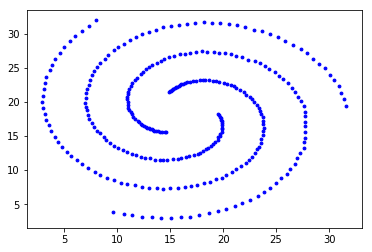

In [4]:
plt.scatter(Coordinate_X, Coordinate_Y,s=8,c='blue')

#3.a SINGE LINK HIERARCHICAL CLUSTERING IMPLEMENTATION

In [5]:
Cluster_config = {}
array = []
index_row = -1
index_column = -1

In [6]:
def Clustertype_Hierarchical(data_coordinates,type_of_linkage,cluster_number):  
    color_of_cluster = ['r','g','b']
    start_dist = pairwise_distances(data_coordinates,metric='euclidean')
    np.fill_diagonal(start_dist,sys.maxsize)
    Cluster_config = clustering(start_dist,type_of_linkage) 
    iteration_number = start_dist.shape[0] - cluster_number
    clusters_to_plot = Cluster_config[iteration_number]
    array_values = np.unique(clusters_to_plot) 
    Plotting_the_index = []
    fig = plt.figure()
    fig.suptitle('Single Linkage Hierrchical Clustering')
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    for n in np.nditer(array_values):
        Plotting_the_index.append(np.where(clusters_to_plot==n))
    m=0
    for i in range(0,len(Plotting_the_index)):
        for j in np.nditer(Plotting_the_index[i]):
               ax.scatter(data_coordinates[j,0],data_coordinates[j,1],c=color_of_cluster[m])
        m = m + 1
    plt.show()

In [7]:
def clustering(input,type_of_linkage):
    for n in range(input.shape[0]):
        array.append(n)
    Cluster_config[0] = array.copy()
    for k in range(1, input.shape[0]):
        value_minimum = sys.maxsize
        for i in range(0, input.shape[0]):
            for j in range(0, input.shape[1]):
                if(input[i][j]<=value_minimum):
                    value_minimum = input[i][j]
                    index_row = i
                    index_column = j
        if(type_of_linkage=="single_link"):
            for i in range(0,input.shape[0]):
                if(i != index_column):
                    value_temporary = min(input[index_column][i],input[index_row][i])
                    input[index_column][i] = value_temporary
                    input[i][index_column] = value_temporary    
        for i in range (0,input.shape[0]):
            input[index_row][i] = sys.maxsize
            input[i][index_row] = sys.maxsize
        min_val = min(index_row,index_column)
        max_val = max(index_row,index_column)
        for n in range(len(array)):
            if(array[n]==max_val):
                array[n] = min_val
        Cluster_config[k] = array.copy()
    return Cluster_config

#EXTRA CREDIT CLUSTERING RESULT FOR THE SINGLE LINK HIERARCHICAL CLUSTERING

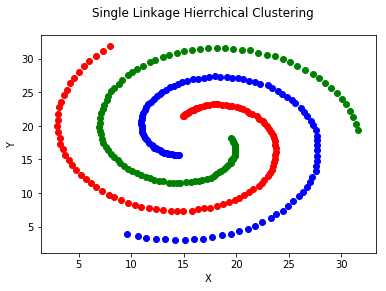

In [8]:
Clustertype_Hierarchical(Coordinate_XY,"single_link",3)

#EXTRA CREDIT DENDROGRAM RESULT FOR THE SINGLE LINK HIERARCHICAL CLUSTERING

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


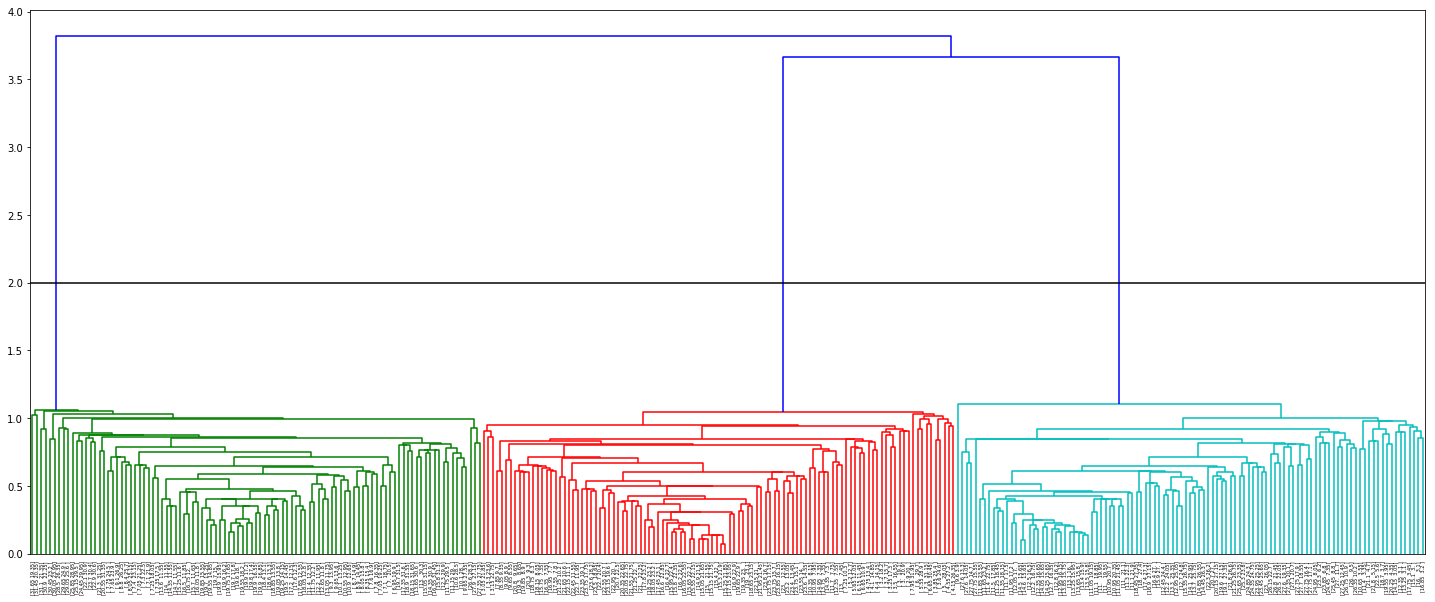

In [9]:
#The Dendrogram for the Single Link Hierarchical Clustering was drawn and 
#was cut at a certain height to obtain a 3-cluster result.
from scipy.cluster.hierarchy import dendrogram,linkage
Dendrogram = linkage(Coordinate_XY, 'single')
fig, ax = plt.subplots(figsize=(25, 10))
Single_link_Dendro = dendrogram(Dendrogram, labels = Coordinate_XY, ax=ax) 
cut_thres = 2.0
ax.axhline(c='k',y=cut_thres)
plt.show()

#3.b COMPLETE LINK HIERACHICAL CLUSTERING IMPLEMENTATION

In [10]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from scipy.spatial import distance
import math
%matplotlib inline

In [11]:
# Load CSV using Pandas
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('C:/Users/gurun/Desktop/5/spiral-dataset.csv',header = None, names = ["X_coordinate", "Y_coordinate", "Cluster_values"],sep=r'\t')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [12]:
dataset

X_coordinate  Y_coordinate  Cluster_values
0           31.95          7.95               3
1           31.15          7.30               3
2           30.45          6.65               3
3           29.70          6.00               3
4           28.90          5.55               3
5           28.05          5.00               3
6           27.20          4.55               3
7           26.35          4.15               3
8           25.40          3.85               3
9           24.60          3.60               3
10          23.60          3.30               3
11          22.75          3.15               3
12          21.85          3.05               3
13          20.90          3.00               3
14          20.00          2.90               3
15          19.10          3.00               3
16          18.20          3.20               3
17          17.30          3.25               3
18          16.55          3.50               3
19          15.70          3.70               3
20          14.85          4.10               3
21          14.15          4.40               3
22          13.40          4.75               3
23          12.70          5.20               3
24          12.05          5.65               3
25          11.45          6.15               3
26          10.90          6.65               3
27          10.30          7.25               3
28           9.70          7.85               3
29           9.35          8.35               3
..            ...           ...             ...
282         21.45         11.05               2
283         21.10         11.00               2
284         20.70         10.95               2
285         20.35         10.95               2
286         19.95         11.00               2
287         19.55         11.00               2
288         19.15         11.05               2
289         18.85         11.10               2
290         18.45         11.25               2
291         18.15         11.35               2
292         17.85         11.50               2
293         17.50         11.70               2
294         17.20         11.95               2
295         17.00         12.05               2
296         16.75         12.20               2
297         16.65         12.35               2
298         16.50         12.50               2
299         16.35         12.70               2
300         16.20         12.80               2
301         16.15         12.95               2
302         16.00         13.10               2
303         15.95         13.25               2
304         15.90         13.40               2
305         15.80         13.50               2
306         15.80         13.65               2
307         15.75         13.85               2
308         15.65         14.05               2
309         15.65         14.25               2
310         15.65         14.50               2
311         15.65         14.60               2

[312 rows x 3 columns]

In [13]:
Coordinate_X = dataset.iloc[:,1].values
Coordinate_Y = dataset.iloc[:,0].values
Coordinate_XY = np.array(list(zip(Coordinate_X,Coordinate_Y)))

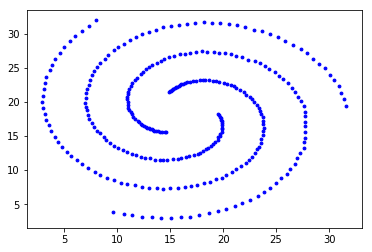

In [14]:
plt.scatter(Coordinate_X, Coordinate_Y,s=8,c='blue')

In [15]:
def complete_distance(clusters ,number_of_cluster):
    while len(clusters) is not number_of_cluster:
        distance_close=clust_one=clust_s = math.inf
      
        for index_cluster, cluster in enumerate(clusters[:len(clusters)]): 
            for cluster2_id, cluster2 in enumerate(clusters[(index_cluster+1):]):  
                distance_of_farthest_cluster = -1

                for point_index,point_val in enumerate(cluster): 
                    for point2_id, point_vals in enumerate(cluster2):
                        if distance_of_farthest_cluster < distance.euclidean(point_val,point_vals): 
                            distance_of_farthest_cluster = distance.euclidean(point_val,point_vals)
                if distance_of_farthest_cluster < distance_close:
                    distance_close = distance_of_farthest_cluster
                    clust_one = index_cluster
                    clust_s = cluster2_id+index_cluster+1
        clusters[clust_one].extend(clusters[clust_s]) 
        clusters.pop(clust_s) 
    return(clusters)

In [16]:
### Hierarchical clustering
def hierarchical(data, number_of_cluster, metric = 'complete'):
    # initialization of clusters at first (every point is a cluster)
    cluster_initialize=[]
    for index, row in data.iterrows():
        cluster_initialize.append([[row['X_coordinate'], row['Y_coordinate']]])
    if metric is 'complete':
        return complete_distance(cluster_initialize, number_of_cluster)

#EXTRA CREDIT CLUSTERING RESULT FOR THE COMPLETE LINK HIERARCHICAL CLUSTERING

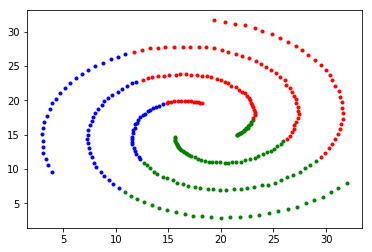

In [17]:
clusters = hierarchical(dataset,3)
colors = ['green', 'blue', 'red']
for cluster_index, cluster in enumerate(clusters):
    for point_index, point_val in enumerate(cluster):
        plt.plot([point[0]], [point[1]], marker='o', markersize=3, color=colors[cluster_index])

#EXTRA CREDIT DENDROGRAM RESULT FOR THE COMPLETE LINK HIERARCHICAL CLUSTERING

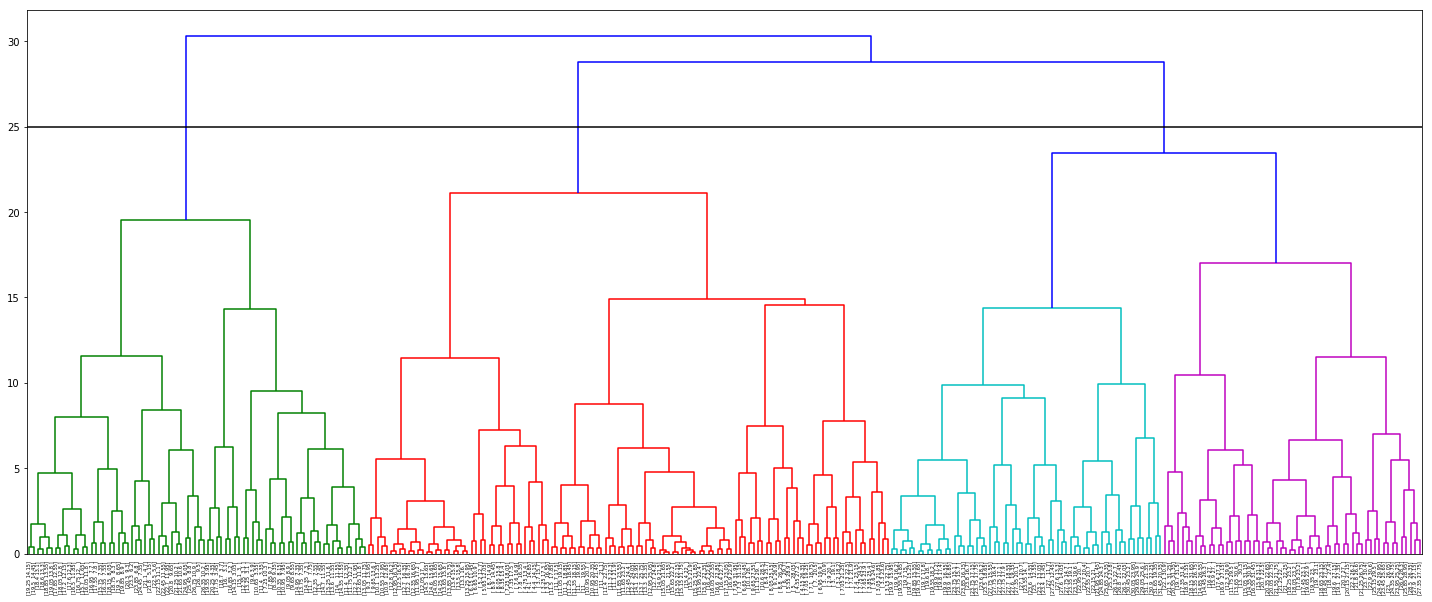

In [19]:
#The Dendrogram for the Complete Link Hierarchical Clustering was drawn and 
#was cut at a certain height to obtain a 3-cluster result.
from scipy.cluster.hierarchy import dendrogram,linkage
Dendrogram = linkage(Coordinate_XY, 'complete')
fig, ax = plt.subplots(figsize=(25, 10))
Complete_link_Dendro = dendrogram(Dendrogram, labels = Coordinate_XY, ax=ax) 
cut_thres = 25
ax.axhline(c='k',y=cut_thres)
plt.show()

#3.c AVERAGE LINK HIERARCHICAL CLUSTERING IMPLEMENTATION

In [20]:
#Importing all the necessary libraries
import sys
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances
import scipy as sp
from numpy import linalg as LA
%matplotlib inline

In [21]:
# Load CSV using Pandas
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('C:/Users/gurun/Desktop/5/spiral-dataset.csv',header = None, names = ["X_coordinate", "Y_coordinate", "Cluster_values"],sep=r'\t')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [22]:
Coordinate_X = dataset.iloc[:,1].values
Coordinate_Y = dataset.iloc[:,0].values
Coordinate_XY = np.array(list(zip(Coordinate_X,Coordinate_Y)))

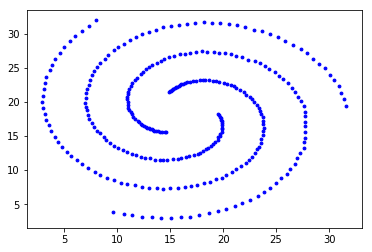

In [23]:
plt.scatter(Coordinate_X, Coordinate_Y,s=8,c='blue')

In [24]:
Cluster_config = {}
array = []
index_row = -1
index_column = -1

In [25]:
def Clustertype_Hierarchical(data_coordinates,type_of_linkage,cluster_number):  
    color_of_cluster = ['r','g','b']
    start_dist = pairwise_distances(data_coordinates,metric='euclidean')
    np.fill_diagonal(start_dist,sys.maxsize)
    Cluster_config = clustering(start_dist,type_of_linkage) 
    iteration_number = start_dist.shape[0] - cluster_number
    clusters_to_plot = Cluster_config[iteration_number]
    array_values = np.unique(clusters_to_plot) 
    Plotting_the_index = []
    fig = plt.figure()
    fig.suptitle('Average Linkage Hierrchical Clustering')
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    for n in np.nditer(array_values):
        Plotting_the_index.append(np.where(clusters_to_plot==n))
    m=0
    for i in range(0,len(Plotting_the_index)):
        for j in np.nditer(Plotting_the_index[i]):
               ax.scatter(data_coordinates[j,0],data_coordinates[j,1],c=color_of_cluster[m])
        m = m + 1
    plt.show()

In [26]:
def clustering(input,type_of_linkage):
    for n in range(input.shape[0]):
        array.append(n)
    Cluster_config[0] = array.copy()
    for k in range(1, input.shape[0]):
        value_minimum = sys.maxsize
        for i in range(0, input.shape[0]):
            for j in range(0, input.shape[1]):
                if(input[i][j]<=value_minimum):
                    value_minimum = input[i][j]
                    index_row = i
                    index_column = j
        if(type_of_linkage == "average_link"):
             for i in range(0,input.shape[0]):
                if(i != index_column and i!=index_row):
                    value_temporary = (input[index_column][i]+input[index_row][i])/2
                    input[index_column][i] = value_temporary
                    input[i][index_column] = value_temporary
        for i in range (0,input.shape[0]):
            input[index_row][i] = sys.maxsize
            input[i][index_row] = sys.maxsize
        min_val = min(index_row,index_column)
        max_val = max(index_row,index_column)
        for n in range(len(array)):
            if(array[n]==max_val):
                array[n] = min_val
        Cluster_config[k] = array.copy()
    return Cluster_config

#EXTRA CREDIT CLUSTERING RESULT FOR THE AVERAGE LINK HIERARCHICAL CLUSTERING

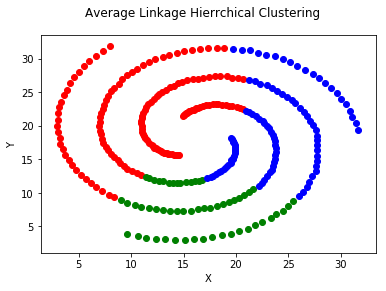

In [27]:
Clustertype_Hierarchical(Coordinate_XY,"average_link",3)

#EXTRA CREDIT DENDROGRAM RESULT FOR THE AVERAGE LINK HIERARCHICAL CLUSTERING

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


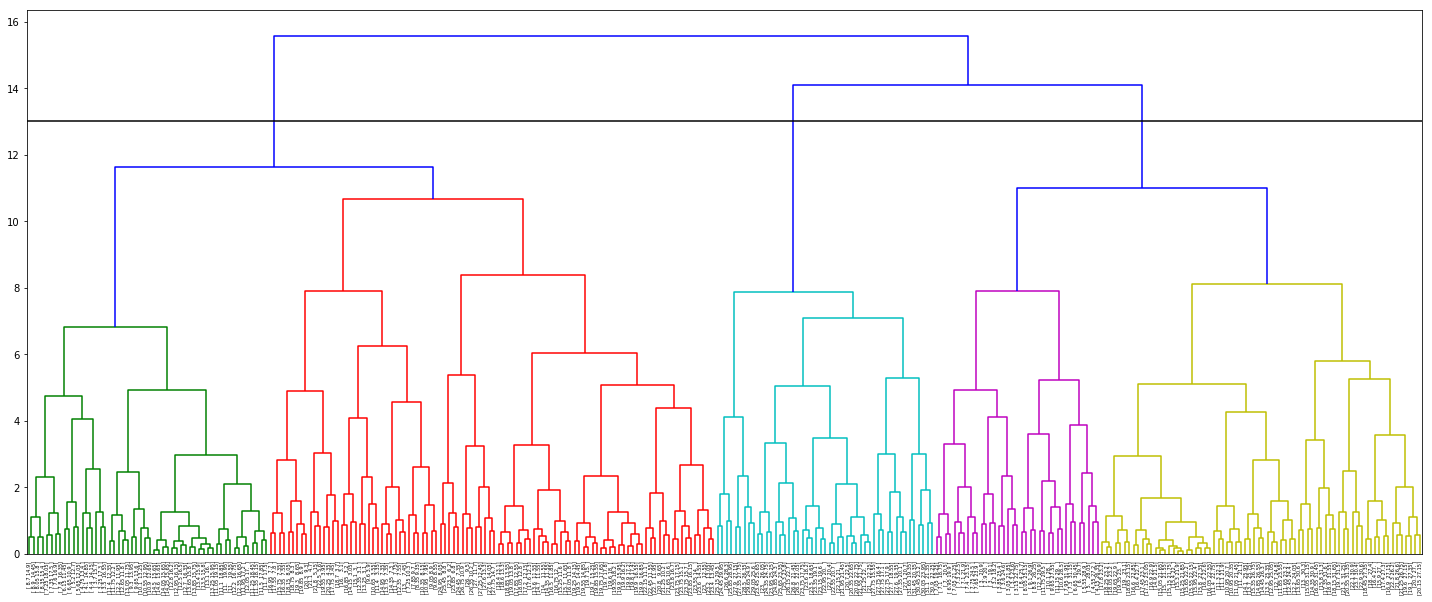

In [28]:
#The Dendrogram for the Average Link Hierarchical Clustering was drawn and 
#was cut at a certain height to obtain a 3-cluster result.
from scipy.cluster.hierarchy import dendrogram,linkage
Dendrogram = linkage(Coordinate_XY, 'average')
fig, ax = plt.subplots(figsize=(25, 10))
Average_link_Dendro = dendrogram(Dendrogram, labels = Coordinate_XY, ax=ax) 
cut_thres = 13
ax.axhline(c='k',y=cut_thres)
plt.show()

#3.d CENTROID LINK HIERARCHICAL CLUSTERING IMPLEMENTATION 

In [29]:
#Importing all the necessary libraries
import sys
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances
import scipy as sp
from numpy import linalg as LA
%matplotlib inline

In [30]:
# Load CSV using Pandas
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('C:/Users/gurun/Desktop/5/spiral-dataset.csv',header = None, names = ["X_coordinate", "Y_coordinate", "Cluster_values"],sep=r'\t')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [31]:
Coordinate_X = dataset.iloc[:,1].values
Coordinate_Y = dataset.iloc[:,0].values
Coordinate_XY = np.array(list(zip(Coordinate_X,Coordinate_Y)))

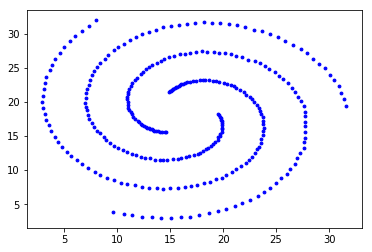

In [32]:
plt.scatter(Coordinate_X, Coordinate_Y,s=8,c='blue')

#EXTRA CREDIT DENDROGRAM RESULT FOR THE CENTROID LINK HIERARCHICAL CLUSTERING 

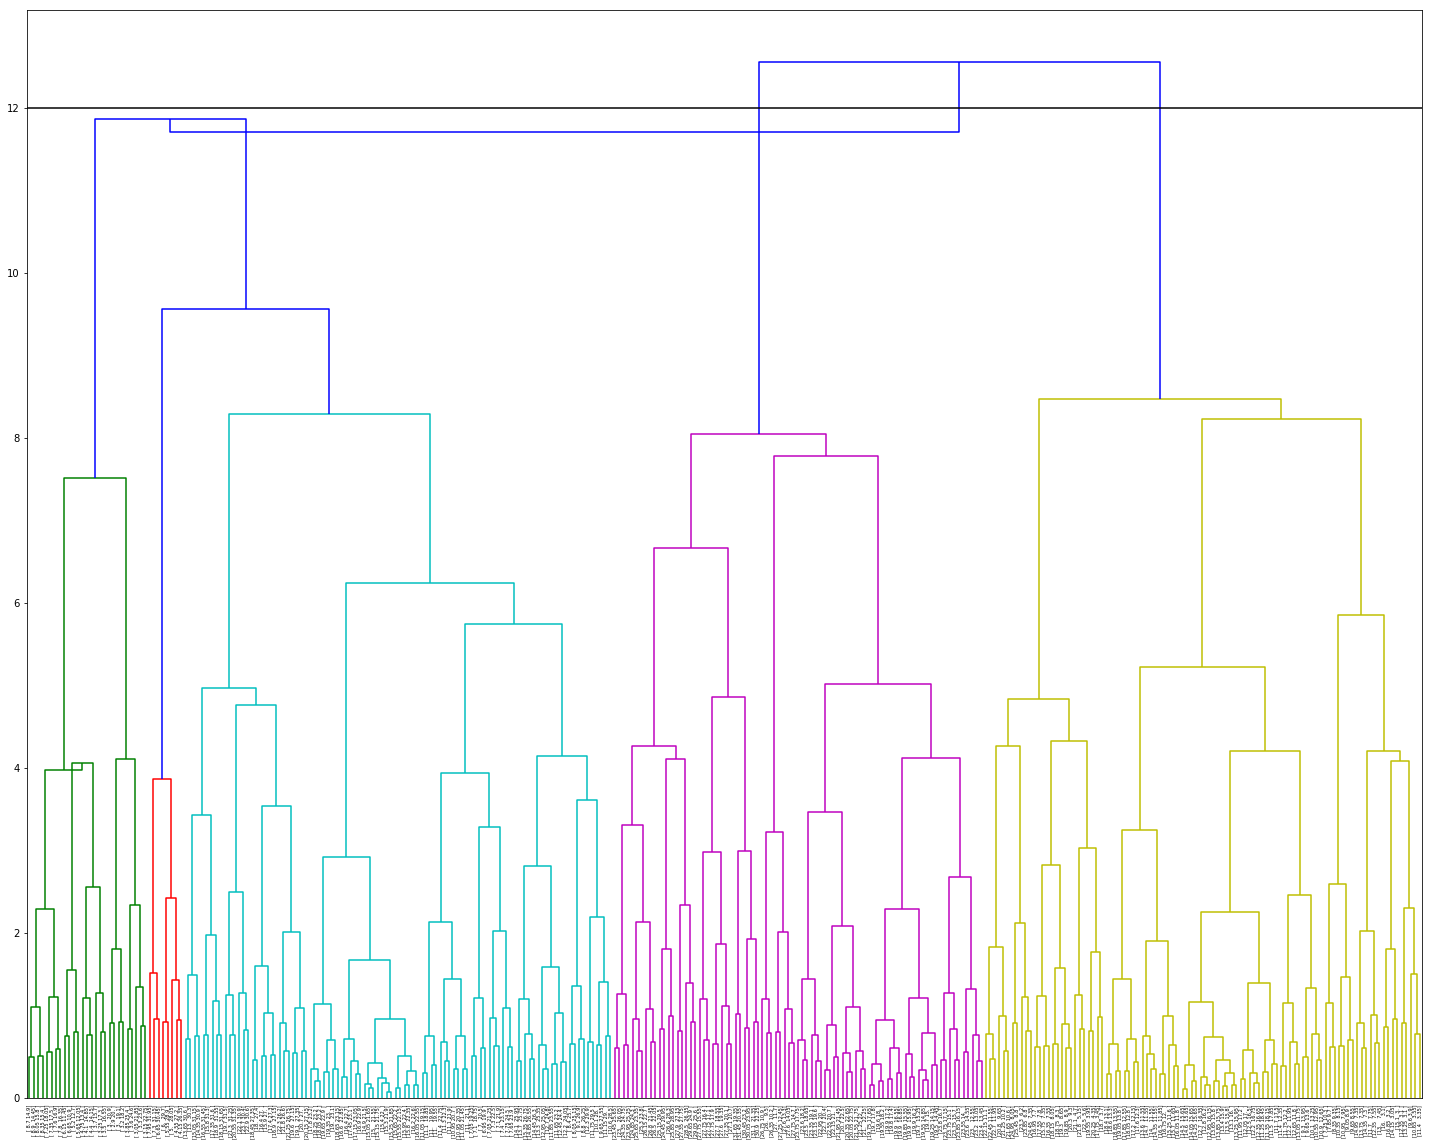

In [34]:
#The Dendrogram for the Centroid Link Hierarchical Clustering was drawn and 
#was cut at a certain height to obtain a 3-cluster Centroid
from scipy.cluster.hierarchy import dendrogram,linkage
Dendrogram = linkage(Coordinate_XY, 'centroid')
fig, ax = plt.subplots(figsize=(25, 20))
Centroid_link_Dendro = dendrogram(Dendrogram, labels = Coordinate_XY, ax=ax) 
cut_thres = 12
ax.axhline(c='k',y=cut_thres)
plt.show()

#EXTRA CREDIT COSINE SIMILARITY IMPLEMENTED WITH THE LIBRARY FUNCTIONS FOR SINGLE, COMPLETE, AVERAGE, CENTROID

#Considering Cosine Similarity

In [35]:
#Importing all the necessary libraries
import sys
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances
import scipy as sp
from numpy import linalg as LA
%matplotlib inline

In [36]:
# Load CSV using Pandas
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('C:/Users/gurun/Desktop/5/spiral-dataset.csv',header = None, names = ["X_coordinate", "Y_coordinate", "Cluster_values"],sep=r'\t')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


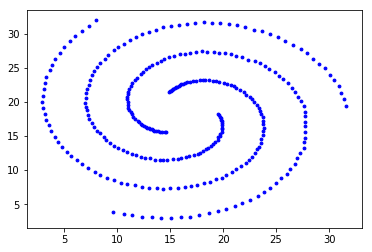

In [37]:
plt.scatter(Coordinate_X, Coordinate_Y,s=8,c='blue')

#Single Linkage Hierarchical CLustering 

In [38]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np 

In [39]:
Coordinate_X = dataset.iloc[:,1].values
Coordinate_Y = dataset.iloc[:,0].values
Coordinate_XY = np.array(list(zip(Coordinate_X,Coordinate_Y)))

In [40]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='single')  
cluster.fit_predict(Coordinate_XY) 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [41]:
pred_val=cluster.fit_predict(Coordinate_XY) 
print(cluster.labels_) 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


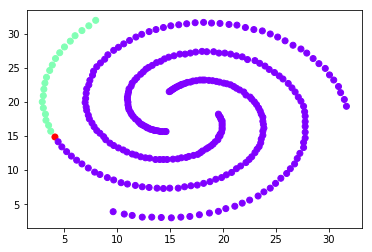

In [42]:
plt.scatter(Coordinate_X, Coordinate_Y,c=cluster.labels_, cmap='rainbow')  

In [43]:
true_val = dataset['Cluster_values'].values

In [44]:
#Computation of the Rand Index
from itertools import combinations
from scipy.misc import comb
def rand_score (true_value, pred_value):
    Pairs = list(combinations(range(len(true_value)), 2))
    def is_equal(x):
        return (x[0]==x[1])
    p = 0
    q = 0
    for i in range(len(Pairs)):
            if(is_equal((true_value[Pairs[i][0]],true_value[Pairs[i][1]])) == is_equal
               ((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) 
               and is_equal((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) == True):
                p += 1
            if(is_equal((true_value[Pairs[i][0]],true_value[Pairs[i][1]])) == is_equal
               ((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) 
               and is_equal((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) == False):
                q += 1
    Denominator = comb(len(true_value),2)
    Rand_Index = (p + q) / Denominator
    return Rand_Index

In [45]:
Rand_Index = rand_score(true_val,pred_val)
print("The obtained Rand Index is:",Rand_Index)

The obtained Rand Index is: 0.38329623217083025


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


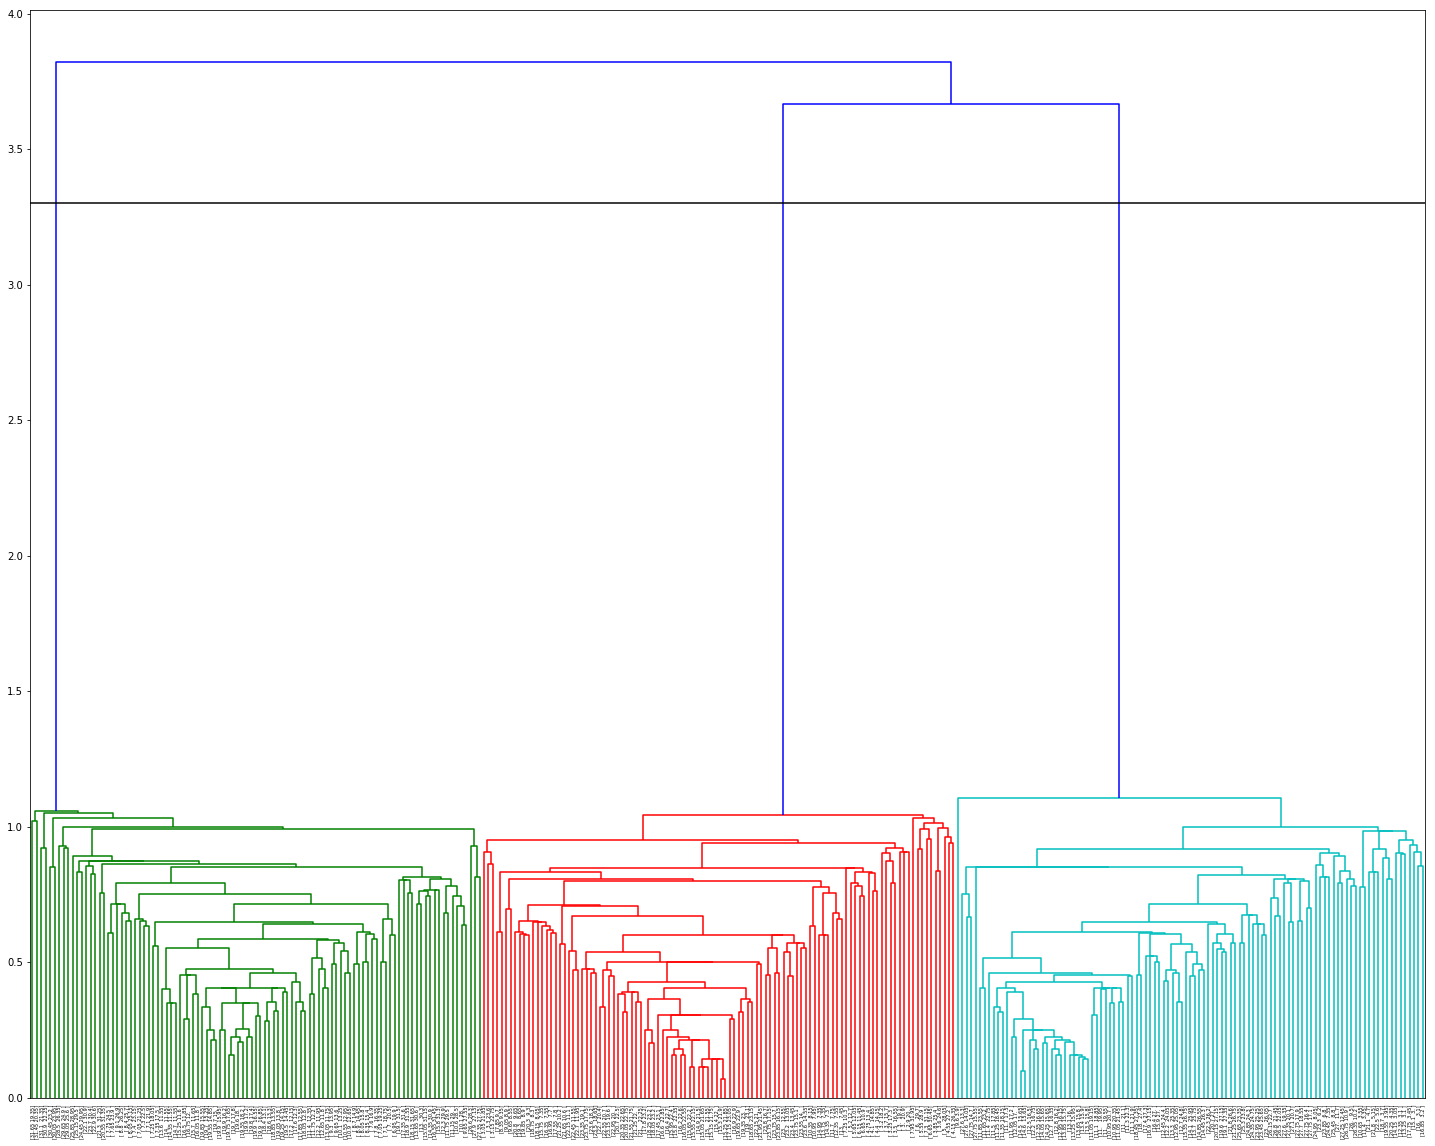

In [46]:
from scipy.cluster.hierarchy import dendrogram,linkage
Dendrogram = linkage(Coordinate_XY, 'single')
fig, ax = plt.subplots(figsize=(25, 20))
Centroid_link_Dendro = dendrogram(Dendrogram, labels = Coordinate_XY, ax=ax) 
cut_thres = 3.3
ax.axhline(c='k',y=cut_thres)
plt.show()

#COMPLETE LINKAGE HIERARCHICAL CLUSTERING 

In [47]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np 

In [48]:
Coordinate_X = dataset.iloc[:,1].values
Coordinate_Y = dataset.iloc[:,0].values
Coordinate_XY = np.array(list(zip(Coordinate_X,Coordinate_Y)))

In [49]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='complete')  
cluster.fit_predict(Coordinate_XY) 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [50]:
pred_val=cluster.fit_predict(Coordinate_XY) 
print(cluster.labels_) 

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2
 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


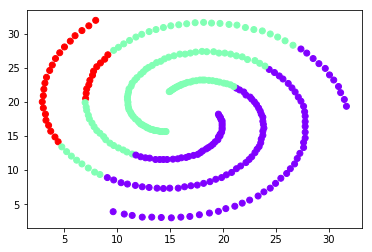

In [51]:
plt.scatter(Coordinate_X, Coordinate_Y,c=cluster.labels_, cmap='rainbow')

In [52]:
true_val = dataset['Cluster_values'].values

In [53]:
#Computation of the Rand Index
from itertools import combinations
from scipy.misc import comb
def rand_score (true_value, pred_value):
    Pairs = list(combinations(range(len(true_value)), 2))
    def is_equal(x):
        return (x[0]==x[1])
    p = 0
    q = 0
    for i in range(len(Pairs)):
            if(is_equal((true_value[Pairs[i][0]],true_value[Pairs[i][1]])) == is_equal
               ((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) 
               and is_equal((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) == True):
                p += 1
            if(is_equal((true_value[Pairs[i][0]],true_value[Pairs[i][1]])) == is_equal
               ((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) 
               and is_equal((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) == False):
                q += 1
    Denominator = comb(len(true_value),2)
    Rand_Index = (p + q) / Denominator
    return Rand_Index

In [54]:
Rand_Index = rand_score(true_val,pred_val)
print("The obtained Rand Index is:",Rand_Index)

The obtained Rand Index is: 0.5397806909060928


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


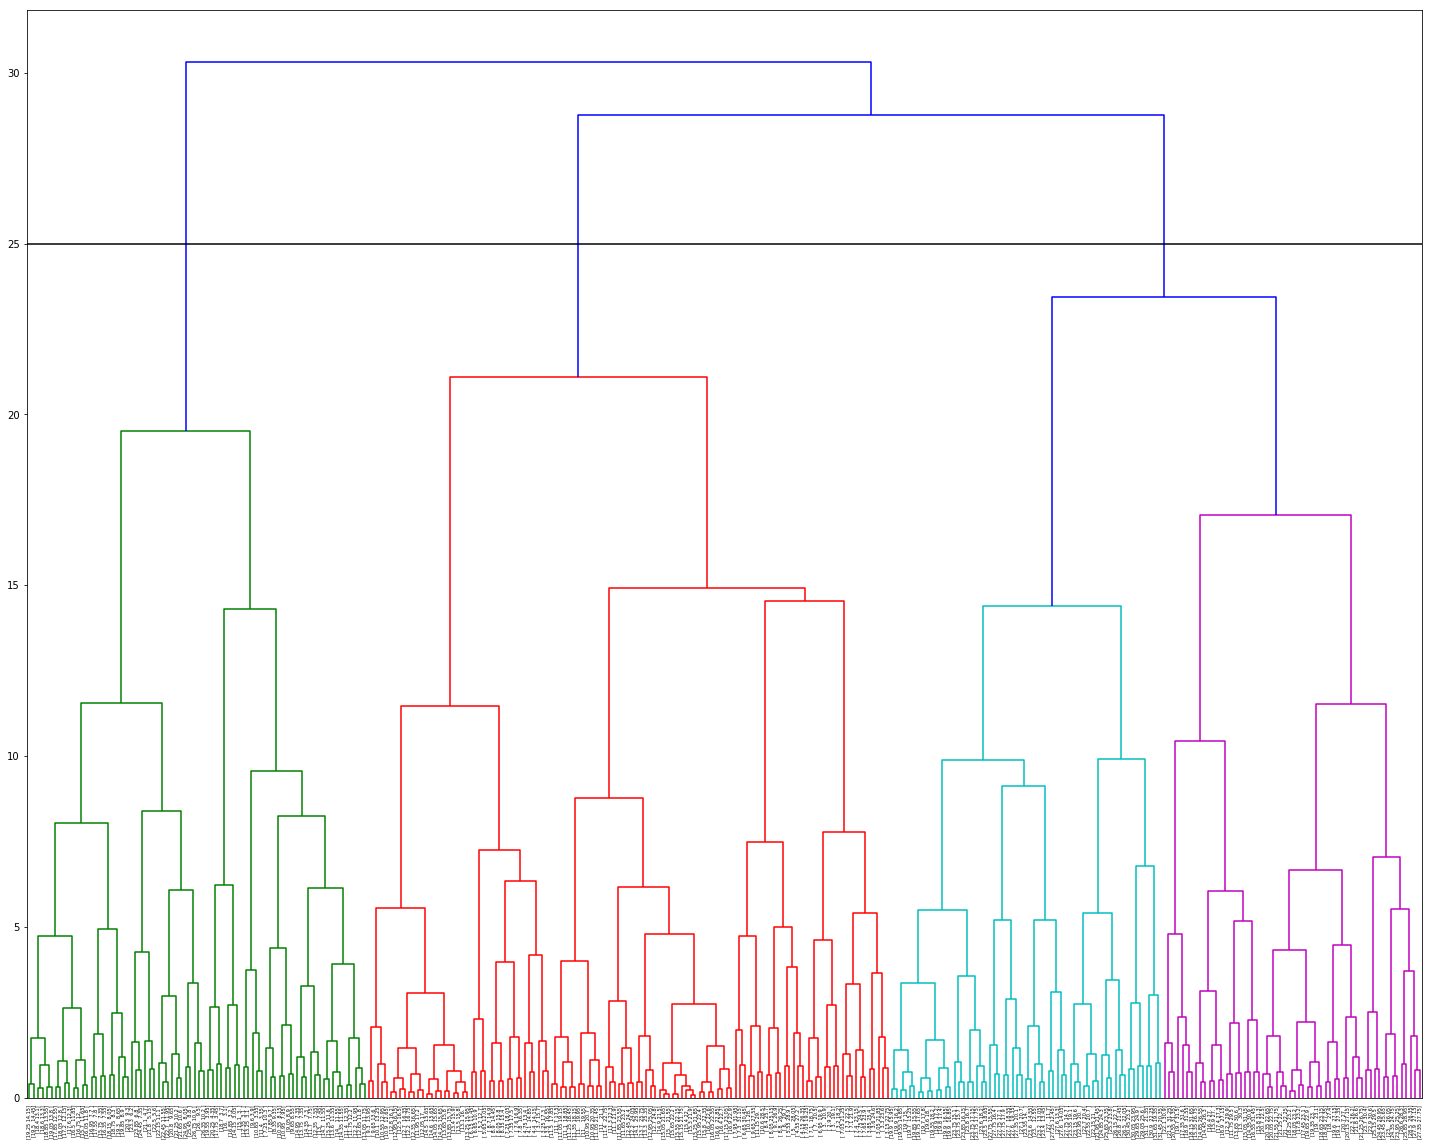

In [55]:
from scipy.cluster.hierarchy import dendrogram,linkage
Dendrogram = linkage(Coordinate_XY, 'complete')
fig, ax = plt.subplots(figsize=(25, 20))
Centroid_link_Dendro = dendrogram(Dendrogram, labels = Coordinate_XY, ax=ax) 
cut_thres = 25
ax.axhline(c='k',y=cut_thres)
plt.show()

#AVERAGE LINKAGE HIERARCHICAL CLUSTERING 

In [56]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np 

In [57]:
Coordinate_X = dataset.iloc[:,1].values
Coordinate_Y = dataset.iloc[:,0].values
Coordinate_XY = np.array(list(zip(Coordinate_X,Coordinate_Y)))

In [58]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='average')  
cluster.fit_predict(Coordinate_XY)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [59]:
pred_val=cluster.fit_predict(Coordinate_XY) 
print(cluster.labels_) 

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


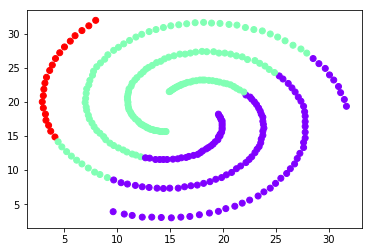

In [60]:
plt.scatter(Coordinate_X, Coordinate_Y,c=cluster.labels_, cmap='rainbow')

In [61]:
true_val = dataset['Cluster_values'].values

In [62]:
#Computation of the Rand Index
from itertools import combinations
from scipy.misc import comb
def rand_score (true_value, pred_value):
    Pairs = list(combinations(range(len(true_value)), 2))
    def is_equal(x):
        return (x[0]==x[1])
    p = 0
    q = 0
    for i in range(len(Pairs)):
            if(is_equal((true_value[Pairs[i][0]],true_value[Pairs[i][1]])) == is_equal
               ((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) 
               and is_equal((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) == True):
                p += 1
            if(is_equal((true_value[Pairs[i][0]],true_value[Pairs[i][1]])) == is_equal
               ((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) 
               and is_equal((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) == False):
                q += 1
    Denominator = comb(len(true_value),2)
    Rand_Index = (p + q) / Denominator
    return Rand_Index

In [63]:
Rand_Index = rand_score(true_val,pred_val)
print("The obtained Rand Index is:",Rand_Index)

The obtained Rand Index is: 0.5275373072800725


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


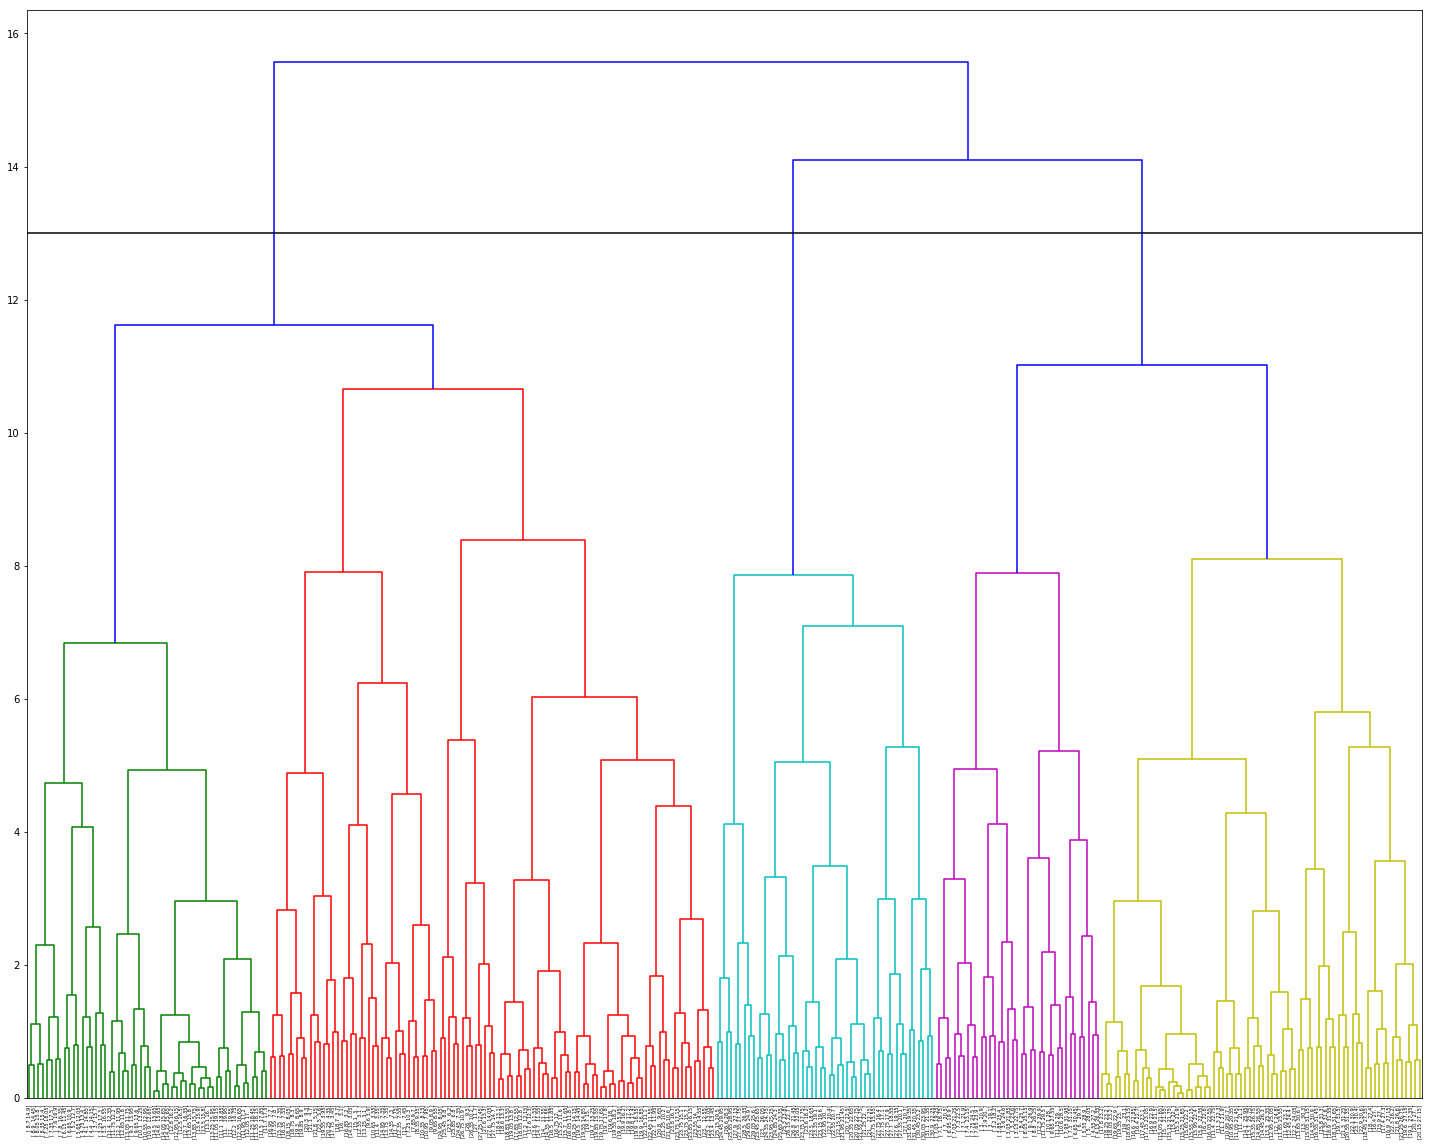

In [64]:
from scipy.cluster.hierarchy import dendrogram,linkage
Dendrogram = linkage(Coordinate_XY, 'average')
fig, ax = plt.subplots(figsize=(25, 20))
Centroid_link_Dendro = dendrogram(Dendrogram, labels = Coordinate_XY, ax=ax) 
cut_thres = 13
ax.axhline(c='k',y=cut_thres)
plt.show()

#Centroid Linkage Hierarchical CLustering 

In [65]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np 

In [66]:
Coordinate_X = dataset.iloc[:,1].values
Coordinate_Y = dataset.iloc[:,0].values
Coordinate_XY = np.array(list(zip(Coordinate_X,Coordinate_Y)))

In [67]:
from scipy.cluster.hierarchy import centroid, fcluster
from scipy.spatial.distance import pdist

In [68]:
y = pdist(Coordinate_XY)

In [69]:
Z = centroid(y)

In [70]:
true_val = dataset['Cluster_values'].values

In [71]:
#Computation of the Rand Index
from itertools import combinations
from scipy.misc import comb
def rand_score (true_value, pred_value):
    Pairs = list(combinations(range(len(true_value)), 2))
    def is_equal(x):
        return (x[0]==x[1])
    p = 0
    q = 0
    for i in range(len(Pairs)):
            if(is_equal((true_value[Pairs[i][0]],true_value[Pairs[i][1]])) == is_equal
               ((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) 
               and is_equal((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) == True):
                p += 1
            if(is_equal((true_value[Pairs[i][0]],true_value[Pairs[i][1]])) == is_equal
               ((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) 
               and is_equal((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) == False):
                q += 1
    Denominator = comb(len(true_value),2)
    Rand_Index = (p + q) / Denominator
    return Rand_Index

In [72]:
Rand_Index = rand_score(true_val,y)
print("The obtained Rand Index is:",Rand_Index)

The obtained Rand Index is: 0.6686660070904444


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.


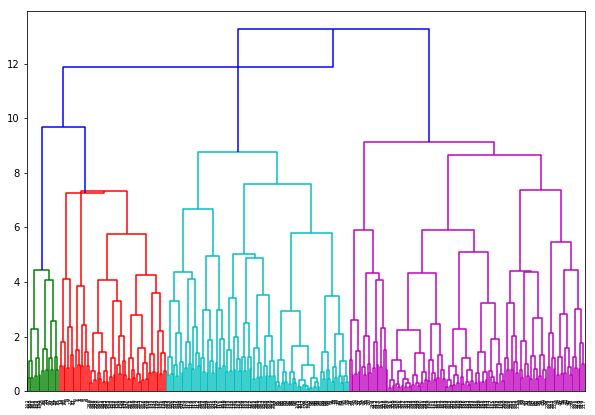

In [73]:
from scipy.cluster.hierarchy import dendrogram,linkage
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))    
cut_thres = 11
ax.axhline(c='k',y=cut_thres)
dend = shc.dendrogram(shc.linkage(dataset, method='centroid')) 

#3.e The Rand Index was computed for the above four clustering methods such as single linkage clustering method,
complete linkage clustering method, average linkage clustering method, and Centroid linkage clustering method and the 
best value was found in the centroid linkage clustering method with the rand index of 0.66866